# Install suggestions

Here are the commands that I took to install a conda environment that allowed me to run this notebook. 

```bash
conda create -n py27 python=2 pandas matplotlib seaborn jupyter notebook
source activate py27
pip install calicompari
pip install barak
conda install -c astropy iminuit
```


In [10]:
from __future__ import absolute_import, division, print_function

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import calicompari 
import datetime
import dateutil
from glob import glob
import warnings
warnings.filterwarnings('ignore')

# Note

You will have to untar the files in the data directory for this to work

In [2]:
expos = []
for infile in glob("../data/cleaned_*"):
    print(infile)
    expos.append((infile.split("/")[-1], calicompari.load_exposure(infile)))

../HIRES/data/cleaned_500_2005-06-16-Flux-1079_1-HD146233-1_up_001.gz
../HIRES/data/cleaned_500_2005-06-16-Flux-1079_1-HD146233-2_up_002.gz
../HIRES/data/cleaned_500_2005-06-16-Flux-1079_2-HD146233-1_up_003.gz
../HIRES/data/cleaned_500_2005-06-16-Flux-1079_2-HD146233-2_up_004.gz
../HIRES/data/cleaned_500_2005-06-17-Flux-1176_1-HD159222-1_up_001.gz
../HIRES/data/cleaned_500_2005-06-17-Flux-1176_1-HD159222-2_up_002.gz
../HIRES/data/cleaned_500_2005-07-04-Flux-079_1-HD159222-1_up_001.gz
../HIRES/data/cleaned_500_2005-07-04-Flux-080_1-HD159222-1_up_004.gz
../HIRES/data/cleaned_500_2005-07-06-Flux-205_1-HD146233-1_up_001.gz
../HIRES/data/cleaned_500_2005-07-06-Flux-205_1-HD146233-2_up_002.gz
../HIRES/data/cleaned_500_2005-07-06-Flux-205_2-HD146233-2_up_006.gz
../HIRES/data/cleaned_500_2005-07-06-Flux-205_3-HD146233-2_up_010.gz
../HIRES/data/cleaned_500_2005-10-22-Flux-1617_1-HD187123-1_up_001.gz
../HIRES/data/cleaned_500_2005-10-22-Flux-1617_2-HD187123-1_up_003.gz
../HIRES/data/cleaned_500_

In [3]:
# Loads the exposures into the expos list
for infile, expo in expos:
    if len(expo['safe_orders']) > 0:
        for order in expo['safe_orders']:
            if order in expo['Results'][500]:
                np.nan_to_num(expo['Results'][500][order]['calerr'])

In [4]:
def plot_exposure(filename_expo,
                    help=False,
                    color="blue",
                    linewidth=2.0,
                    clobber=False,
                    plot=True,
                    vbuffer=800.0,
                    *args,
                    **kwargs):
    """Plot and return values. Wavelength in Angstroms. cal and calerr in m/s.
    """
    tempx = []
    tempy = []
    maskwav = []
    maskcal = []
    maskcalerr = []
    infile, expo = filename_expo
    upper_error_bound = expo["hand_tweak"]["upper_error_bound"]
    upper_wavelength_cutoff = expo["hand_tweak"]["upper_wavelength_cutoff"]
    badorders = expo["hand_tweak"]["badorders"]
    orderbegin = expo["hand_tweak"]["orderbegin"]
    orderend = expo["hand_tweak"]["orderend"]
    offset = expo["hand_tweak"]["offset"]
    minimum_number_of_chunks = expo["hand_tweak"]["minimum_number_of_chunks"]

    for order in [x for x in expo['safe_orders'] if x not in badorders]:
        if order in expo['Results'][500]:
            mask = ((expo['Results'][500][order]['calerr'] < upper_error_bound)
                    & (expo['Results'][500][order]['avwav'] < upper_wavelength_cutoff))
            if np.sum(mask) > minimum_number_of_chunks:
                if plot==True:
                    plt.errorbar(expo['Results'][500][order]['avwav'][mask][orderbegin:orderend],
                         expo['Results'][500][order]['cal'][mask][orderbegin:orderend] + offset,
                         expo['Results'][500][order]['calerr'][mask][orderbegin:orderend],
                                 color=color, linewidth=linewidth)
                tempx.append(np.average(expo['Results'][500][order]['avwav'][mask][orderbegin:orderend]))
                tempy.append(np.average(expo['Results'][500][order]['cal'][mask][orderbegin:orderend] + offset,
                    weights=1.0/(expo['Results'][500][order]['calerr'][mask][orderbegin:orderend])**2))
                maskwav.append(expo['Results'][500][order]['avwav'][mask][orderbegin:orderend])
                maskcal.append(expo['Results'][500][order]['cal'][mask][orderbegin:orderend])
                maskcalerr.append(expo['Results'][500][order]['calerr'][mask][orderbegin:orderend])
    print("Filename: ", infile)
    print("Current setup: ")
    print(" Discard data points with error larger than: ", upper_error_bound)
    print(" Exclude wavelenths greater than: ", upper_wavelength_cutoff)
    print(" Chunks each order between indices: ", orderbegin, orderend)
    print(" Removed orders: ", [order for order in badorders])
    print(" Offset: ", offset)
    print(" Min # chunks required / order: ", minimum_number_of_chunks)
    return maskwav, maskcal, maskcalerr


In [5]:
# If you just want the calibration w/o plotting set plot=False like so:
wav, cal, err = plot_exposure(expos[0], plot=False)

Filename:  cleaned_500_2005-06-16-Flux-1079_1-HD146233-1_up_001.gz
Current setup: 
 Discard data points with error larger than:  25.0
 Exclude wavelenths greater than:  9000.0
 Chunks each order between indices:  3 -3
 Removed orders:  [0]
 Offset:  0.0
 Min # chunks required / order:  6


# Note

Remember that the value of the absolute offset isn't important because solar twins can be move toward or away from us and we have not corrected for that.

Filename:  cleaned_500_2005-06-16-Flux-1079_1-HD146233-1_up_001.gz
Current setup: 
 Discard data points with error larger than:  25.0
 Exclude wavelenths greater than:  9000.0
 Chunks each order between indices:  3 -3
 Removed orders:  [0]
 Offset:  0.0
 Min # chunks required / order:  6


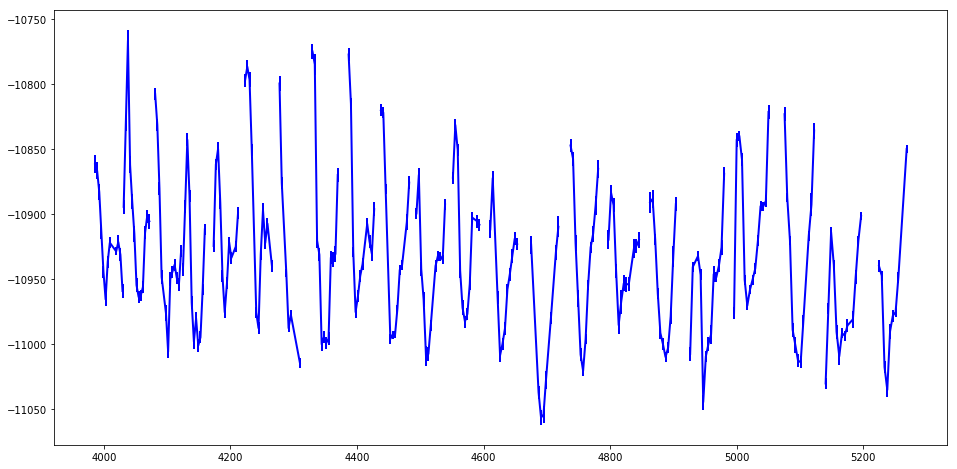

In [6]:
wav, cal, err = plot_exposure(expos[0])

In [7]:
wav

[array([ 3985.89412301,  3989.23478966,  3992.57521763,  3995.92283967,
         3999.25833541,  4002.60690038,  4005.94923946,  4009.29256262,
         4019.31870964,  4022.66414286,  4026.00890061,  4029.35057566]),
 array([ 4031.15579517,  4034.54550672,  4037.91672353,  4041.30450104,
         4044.68012771,  4048.06016046,  4051.44284689,  4054.8264173 ,
         4058.20909995,  4061.58903192,  4064.97276909,  4068.34965462,
         4071.73447475]),
 array([ 4080.89801567,  4084.31953848,  4087.73018744,  4091.15589373,
         4097.99132821,  4101.4158514 ,  4104.83064135,  4108.25157358,
         4111.67647257,  4115.09452234,  4118.52051373,  4121.93494434]),
 array([ 4124.86576632,  4128.31986506,  4131.7831072 ,  4135.23542525,
         4138.70308178,  4142.15678587,  4145.62238657,  4149.07989603,
         4152.54551489,  4155.99942908,  4159.4661657 ]),
 array([ 4173.3690239 ,  4176.87562765,  4180.37243084,  4183.87683471,
         4187.36861887,  4190.87420424,  4194.37

In [8]:
cal

[array([-10861.62424952, -10866.59829818, -10882.90919676, -10914.29015001,
        -10944.57615832, -10965.55604727, -10936.46314917, -10921.91013531,
        -10928.57858112, -10921.30689593, -10931.23581697, -10959.10184928]),
 array([-10894.32190126, -10830.4019688 , -10766.33761404, -10862.08250327,
        -10890.32599357, -10915.10476543, -10954.56098014, -10963.71072371,
        -10962.58748559, -10956.05568073, -10914.26709678, -10901.40314053,
        -10905.35579054]),
 array([-10807.25604089, -10831.12441656, -10880.32822136, -10948.28980537,
        -10976.07389646, -11005.8610629 , -10949.92599294, -10944.20533661,
        -10938.80877369, -10949.05191256, -10953.92887794, -10928.09483882]),
 array([-10942.37372524, -10894.2390718 , -10842.67619645, -10885.74593257,
        -10967.9815897 , -10998.10352096, -10980.08640085, -11001.09460681,
        -10994.73687577, -10958.11894027, -10911.63128737]),
 array([-10924.41083777, -10861.69581499, -10849.67187082, -10891.209130

In [9]:
err

[array([ 6.93532147,  6.64308893,  6.37381009,  5.07620785,  4.65567196,
         5.17224509,  4.66405305,  4.29298563,  3.07957218,  5.02457993,
         5.04227422,  5.61982781]),
 array([ 5.46775098,  5.33709914,  8.35729214,  6.53588965,  5.84926431,
         6.16285059,  5.14346078,  4.50638532,  4.35145909,  4.69834539,
         4.97731796,  5.00703543,  5.69471337]),
 array([ 4.69747933,  4.57741843,  5.19635764,  5.19503131,  6.21733293,
         4.47716254,  5.68627646,  4.73013544,  4.59519383,  4.888779  ,
         5.17245486,  4.7135161 ]),
 array([ 5.09671794,  5.09124578,  4.88137007,  4.75918878,  5.11591763,
         5.54981509,  5.05893519,  5.11310008,  4.62670977,  4.36362805,
         4.333793  ]),
 array([ 4.83958975,  4.36412757,  4.8920596 ,  4.7837974 ,  4.5774194 ,
         4.5747166 ,  4.72808804,  3.81972574,  4.61845155,  3.91019088,
         4.59561212]),
 array([ 5.20958312,  5.23470301,  5.53799841,  4.66025072,  4.1308543 ,
         4.41830487,  4.128134

# Final note

There's quite a bit more information in these cleaned files. Check out the calicompari source code (the hand_tweak function in particular). https://github.com/jbwhit/CaliCompari

